## Problem 1: Markowitz Portfolio Problem ##

First, let us import necessary packages, import the downloaded stock prices (finance_data.csv) and visualize the price movements for each asset. My implemented code can be found at (GITHUB LINK)

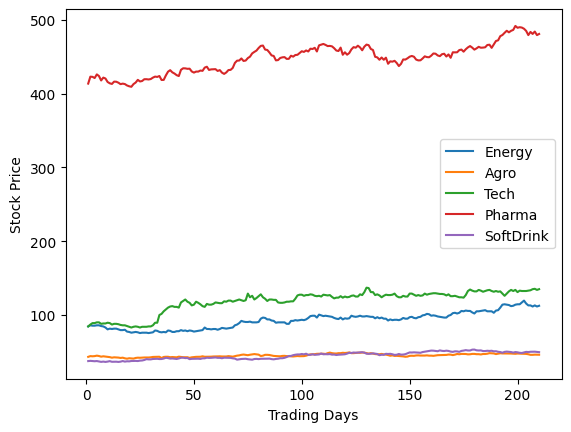

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('finance_data.csv', sep=';', decimal=',')


stock_names = data.columns[1:]

trading_days = data.values[:,0]

stock_prices = data.values[:,1:]

# plot settings



plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.plot(trading_days, stock_prices, label=stock_names)
    
plt.legend()
plt.show()


## a) ##
Estimate the expected return and the volatility of the return of each asset.  
Plot the empirical distribution and the fitted normal distribution for the return of each asset. 


We will utilize the Stock and Portfolio classes from fin_tools. Let us import the necessary module, and create an empty portfolio.

In [70]:
from fin_tools import Portfolio, Stock

portfolio = Portfolio()

Let us now initialize all the stocks using the Stock class, and add them to our portfolio using the add_stocks method.

In [71]:
stocks = [Stock(stock_prices[:, i], stock_names[i]) for i in range(len(stock_names))]
portfolio.add_stocks(stocks)

To view our current portfolio, we use the view_portfolio method.

In [72]:
portfolio.view_portfolio()


Portfolio Composition and Statistics

| Stock Name   |   Initial Price |   Current Price |   Expected Return |   Volatility |   Fitted Expected Return |   Fitted Volatility |
|--------------|-----------------|-----------------|-------------------|--------------|--------------------------|---------------------|
| Energy       |           84.5  |          112.5  |            0.0015 |       0.0148 |                   0.0022 |              0.0147 |
| Agro         |           43.25 |           46.12 |            0.0004 |       0.0108 |                   0.0015 |              0.0102 |
| Tech         |           84.5  |          135    |            0.0024 |       0.0183 |                   0.003  |              0.0186 |
| Pharma       |          413.66 |          480.96 |            0.0007 |       0.0069 |                   0.0007 |              0.0063 |
| SoftDrink    |           37.5  |           49.62 |            0.0014 |       0.0131 |                   0.0008 |              0.0132 |


And to plot the fitted distributions we use the fit_portfolio method.

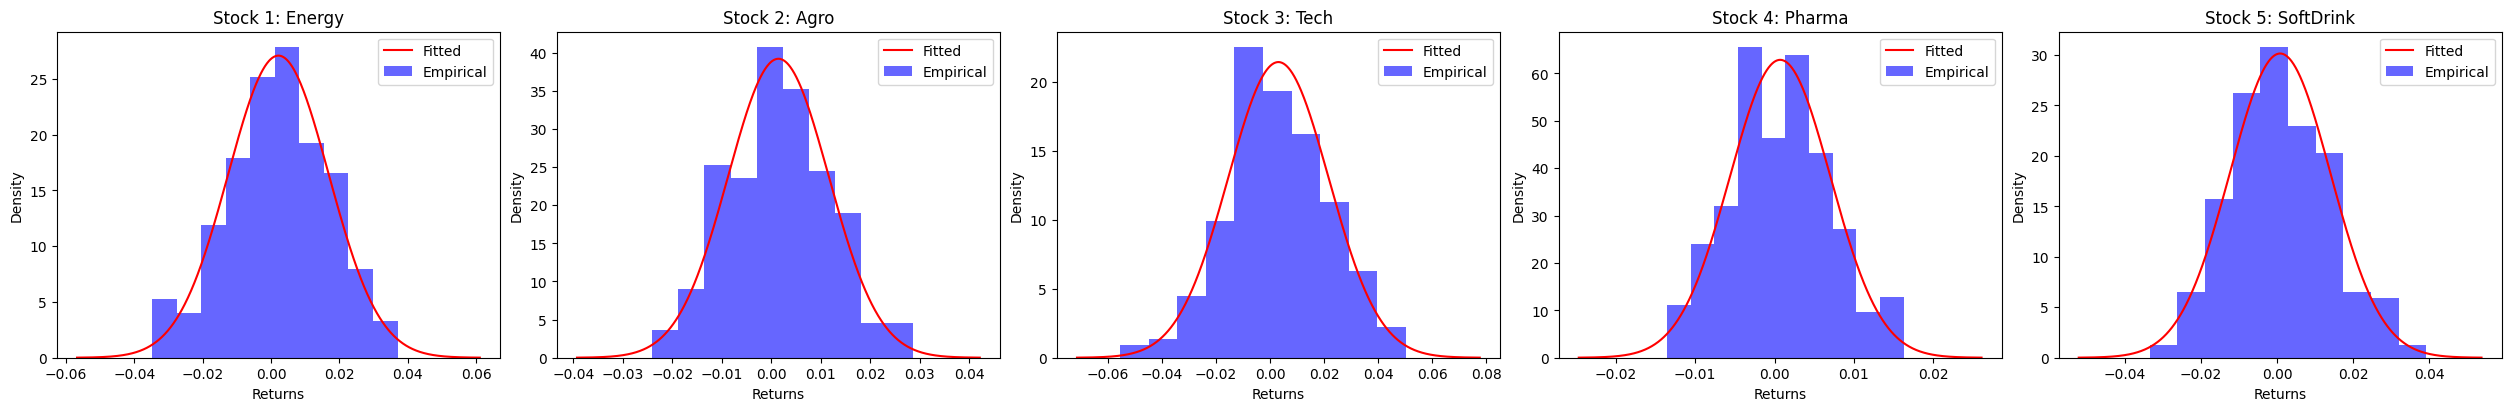

In [73]:
portfolio.fit_portfolio()

## b) ##
Estimate the correlation between the returns of all five asset returns.  
What is the covariance matrix?

Correlation and Covariance matrices can be visualized using show_corr_and_cov_matrix.

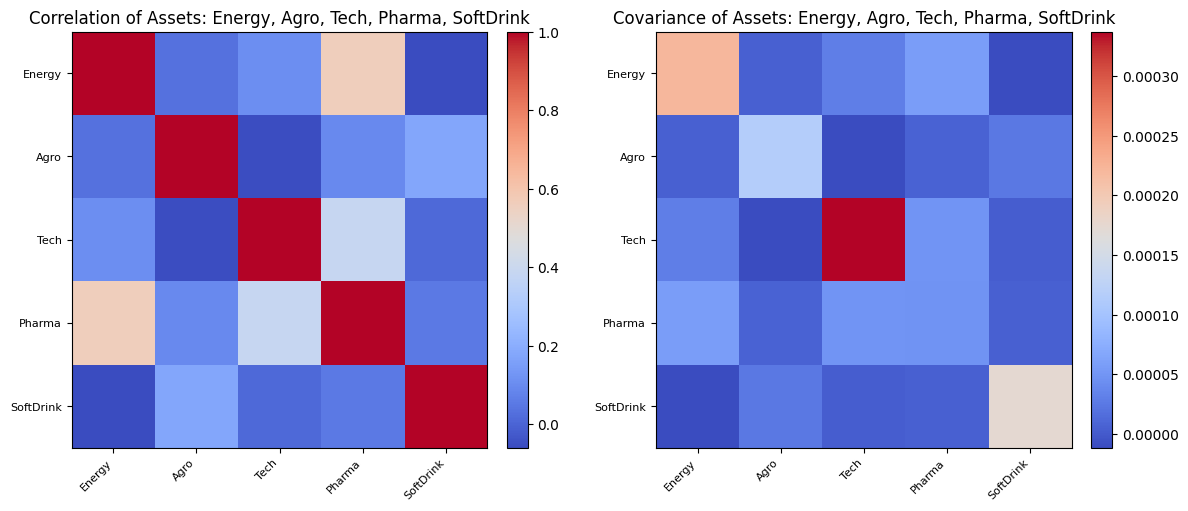

In [74]:
portfolio.show_corr_and_cov_matrix()

## c) ##

Plot the efficient frontier, and find the minimum-variance portfolio (along with its expected return and risk).  
Plot also the $(\sigma, \mu)$-coordinates of each of the fives stocks in the same graphics.  
Comment on what you see.

Using the efficient_frontier method will plot the EF, the minimum-variance portfolio $(\sigma_{\text{min}}, \mu_{\text{min}})$, along with the $(\sigma, \mu)$-coordinates for each asset in the portfolio.

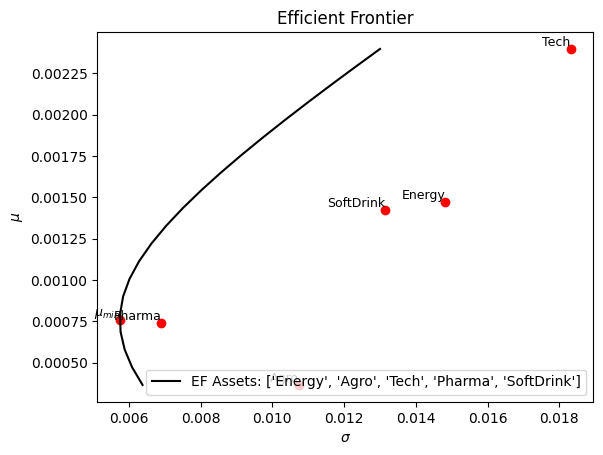

In [75]:
portfolio.efficient_frontier()

## d) ##

Plot the efficient frontier if you remove one of your assets from your portfolio universe (that is, you have only 4 stocks to invest in).  
Explain what happens with the risk and expected return compared to the case of 5 assets.

Let us copy our current portfolio, and remove a stock. 

In [76]:
portfolio2 = portfolio.copy()
portfolio2.remove_stock(stock_names[2])

We can use the compare_portfolio function from fin_tools to plot EF for both portfolios.

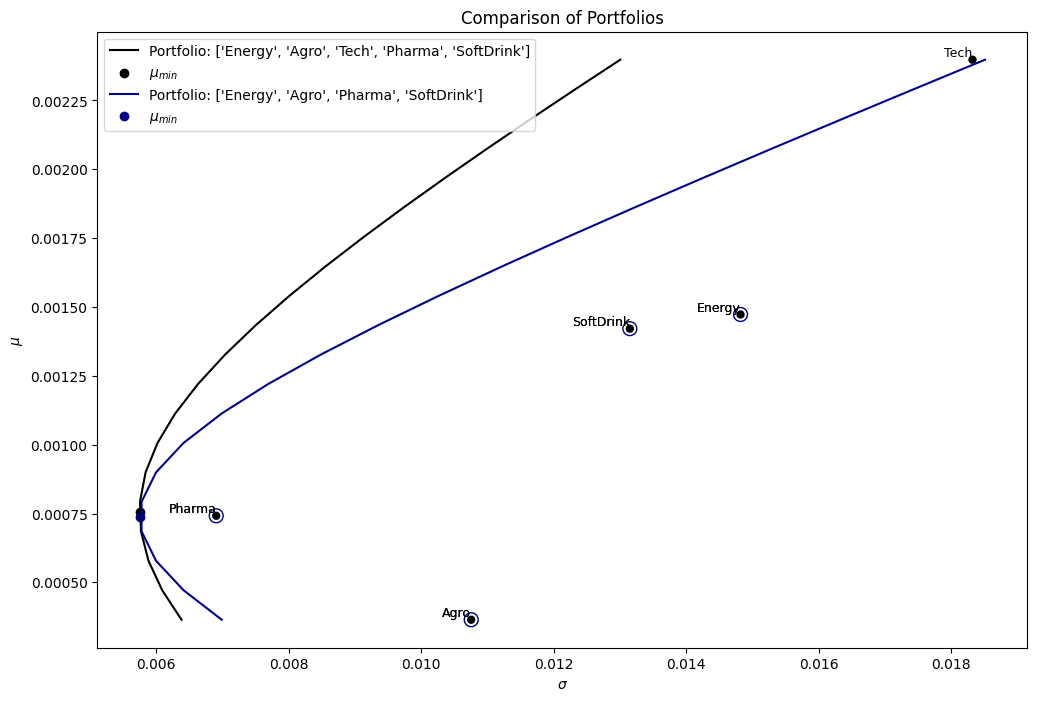

In [77]:
from fin_tools import compare_portfolios
compare_portfolios(portfolio, portfolio2)

## Problem 2: Black & Scholes and Implied Volatility  ##


## a) ##

Implement the Black & Scholes formula, and calculate the price of call options written on an asset where the volatility is either $\sigma = 10\%$, or $\sigma = 30\%$ or $\sigma = 50\%$ (annually).  
For these three different volatility scenarios, plot your calculated options prices for strikes being $K = S_0$, $K = \pm 20\%$ of $S_0$ and $K = \pm 40\%$ of $S_0$,  
and exercise times being $1$ month, $3$ months and half a year. Measure time in years, and reason yourself what the risk-free interest rate r should be.  
You need to provide the argument for the choice.


First, let us import and initialize the Option class from fin_tools.

In [78]:
from fin_tools import Option
option = Option(help_text=True)

Option class initialized.
------------------------------
Add option details manually with:
- Option.add_option(S0, K, volatility, T, r) 
   
   S0    - current stock price:  type float
   K     - strike prices:        type list/array
   sigma - volatility:           type float
   T     - exercise time:        type float
   r     - risk-free rate:       type float
 
Or use a ticker symbol with:
- Option.add_ticker(ticker_symbol) 
   
   ticker_symbol: type string
------------------------------


Let us define the option details from the problem text.

In [79]:
stock_price = 100
strikes = np.array([0.6, 0.8, 1.0, 1.2, 1.4])*stock_price
volatilities = [0.1, 0.3, 0.5]
exercise_times = np.array([1/12, 3/12, 6/12])
risk_free_rate = 0.04

My choice for the risk-free rate is based on range of rates offered by banks in Norway, which is usually between $3.5\%$ - $5\%$.

Now to calculate the B&S call option price we use the method BS_call_price. 

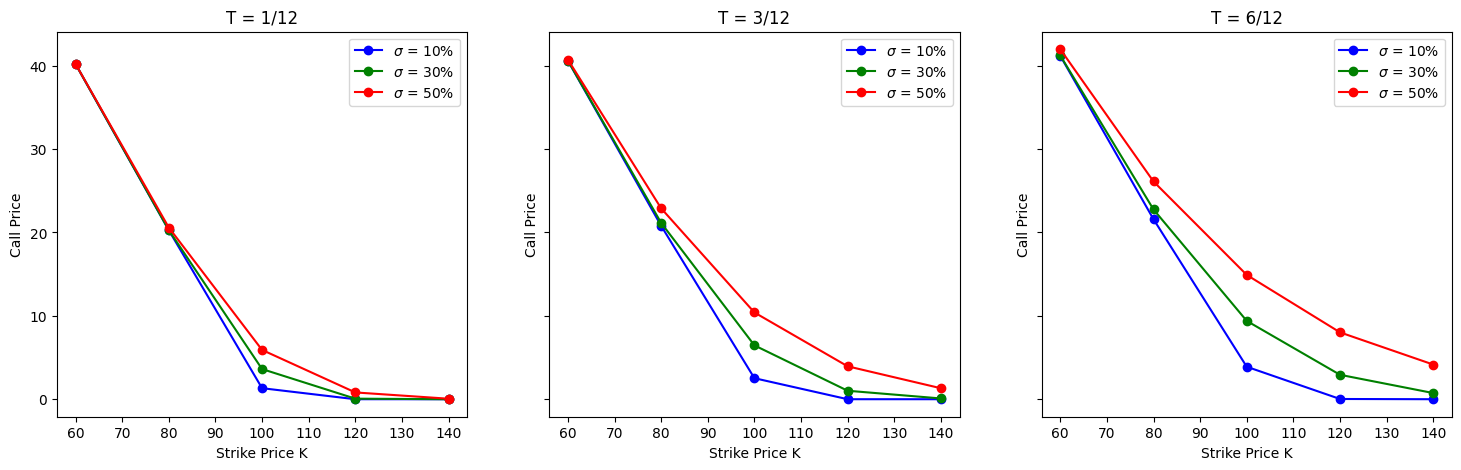

In [80]:
# plot settings
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
T_labels = ['T = 1/12', 'T = 3/12', 'T = 6/12']
colors = ['blue', 'green', 'red']

# call option price loop
# for i, sigma in enumerate(volatilities):
#         ax = axes[i]
#         for T, c, label in zip(exercise_times, colors, T_labels):
#             # initialize the option class
#             option = Option()
#             # add the option details
#             option.add_option(stock_price, strikes, sigma, T, risk_free_rate)
#             # calculate the call option price
#             call_prices = option.BS_call_price(strikes, sigma)
#             # plot the call option price
#             ax.plot(strikes, call_prices, marker='o', color=c, label=label)
#         # set the title of the plot
#         ax.set_title(f'Volatility = {sigma:.0%}')
#         ax.set_xlabel('Strike Price K')
#         ax.set_ylabel('Call Price')
#         ax.legend()


for i, (T, label) in enumerate(zip(exercise_times, T_labels)):
    ax = axes[i]
    ax.set_title(label)
    ax.set_xlabel('Strike Price K')
    ax.set_ylabel('Call Price')
    for sigma, c in zip(volatilities, colors):
        # initialize the option class
        option = Option()
        # add the option details
        option.add_option(stock_price, strikes, sigma, T, risk_free_rate)
        # calculate the call option price
        call_prices = option.BS_call_price(strikes, sigma)
        # plot the call option price
        ax.plot(strikes, call_prices, marker='o', color=c, label=fr'$\sigma$ = {sigma:.0%}')
        ax.legend()
plt.show()



## *b)* ##

*Choose a stock or an index which has call options written on it. Collect market prices for the options for a fixed exercise time,*  
*but with different strikes (at least two above and two below the current price, and one close to the current price).*  
*Calculate the implied volatilities, and plot these as a function of the strikes. Comment on what you find!*

I have decided to use the CBOE VIX index, with data extracted from Yahoo Finance through the yfinance python module. Let us initialize the Option class, add the VIX ticker (^VIX), and set the risk-free rate to the same value as in the previous subproblem.

In [81]:
option = Option()
option.add_ticker("^VIX")
option.set_risk_free_rate(0.04)

Let us now view our Option details.

In [82]:
option.view_option_details()

Option Details Overview
Ticker symbol: ^VIX
Current Stock Price: 20.18
Option Chain: Not Set
 
   - Set the option chain with Option.set_option_chain(N) - where N is the number of the chosen exercise time from the list below
 
Available Option Exercise Times:
  
+-----------------+-----------------+-----------------+-----------------+-----------------+
| Exercise Time 1 | Exercise Time 2 | Exercise Time 3 | Exercise Time 4 | Exercise Time 5 |
+-----------------+-----------------+-----------------+-----------------+-----------------+
|   2025-10-15    |   2025-10-22    |   2025-10-29    |   2025-11-05    |   2025-11-12    |
+-----------------+-----------------+-----------------+-----------------+-----------------+
+-----------------+-----------------+-----------------+-----------------+------------------+
| Exercise Time 6 | Exercise Time 7 | Exercise Time 8 | Exercise Time 9 | Exercise Time 10 |
+-----------------+-----------------+-----------------+-----------------+------------------

Choosing N = 7, and viewing the option details again.

In [83]:
option.set_option_chain(7)
option.view_option_details()

Option Details Overview
Ticker symbol: ^VIX
Current Stock Price: 20.18
Option Maturity Date: 2025-12-17, Time to Maturity: 65.0 days (0.18 years)
Contracts:
 
| contractSymbol     |   strike |   lastPrice |   bid |   ask |   volume |   openInterest |   impliedVolatility |
|--------------------|----------|-------------|-------|-------|----------|----------------|---------------------|
| VIX251217C00010000 |     10   |       11.13 |  9.65 | 11    |      237 |           2082 |            1.03516  |
| VIX251217C00010500 |     10.5 |       10.6  |  9.1  | 10.5  |        5 |           1529 |            0.935548 |
| VIX251217C00011000 |     11   |        9.3  |  8.6  | 10    |        1 |            145 |            0.876954 |
| VIX251217C00011500 |     11.5 |        9.3  |  8.15 |  9.5  |        3 |           2952 |            0.85547  |
| VIX251217C00012000 |     12   |        8.43 |  7.6  |  9    |        5 |           2097 |            0.769534 |
| VIX251217C00012500 |     12.5 |        8.

We want to choose a strike price close to the current stock price $S_0$ (and two above and below the current stock price). We can do so by using the set_closest_strikes method($S_0$, $N=2$)

In [84]:
option.set_closest_strikes(option.stock_price, 2)
option.view_option_details()

Option Details Overview
Ticker symbol: ^VIX
Current Stock Price: 20.18
Option Maturity Date: 2025-12-17, Time to Maturity: 65.0 days (0.18 years)
Contracts:
 
| contractSymbol     |   strike |   lastPrice |   bid |   ask |   volume |   openInterest |   impliedVolatility |
|--------------------|----------|-------------|-------|-------|----------|----------------|---------------------|
| VIX251217C00019000 |     19   |        3.35 |  3.2  |  3.55 |       21 |           1499 |            0.830568 |
| VIX251217C00019500 |     19.5 |        3.75 |  3.05 |  3.4  |       54 |           6716 |            0.8584   |
| VIX251217C00020000 |     20   |        3.6  |  2.96 |  3.15 |    13511 |          69093 |            0.874513 |
| VIX251217C00020500 |     20.5 |        3.4  |  2.8  |  3    |      523 |           9027 |            0.891603 |
| VIX251217C00021000 |     21   |        3.25 |  2.67 |  2.89 |      730 |          52739 |            0.914063 |
 
Calculated Overview
 
|   Strike |   Last

## c) ##
How would the implied volatilities look like if the market used the Black & Scholes formula to price options?

If the market used B&S formula to price options, a constant volatility $\sigma$ would result in monotone 